In [35]:
import json
import pandas as pd
import matplotlib.pyplot as plt

# Load JSON files
file1_path = 'flexible_cot_result_50_C0_1.json'
file2_path = 'All_results.json'

with open(file1_path, 'r') as file1:
    data1 = json.load(file1)

with open(file2_path, 'r') as file2:
    data2 = json.load(file2)

# Convert data to DataFrames
df1 = pd.DataFrame(data1)
df2 = pd.DataFrame(data2)
# df1=df1[(df1['logit_w'] > 0) | ((df1['logit_w'] < 0) & (df1['logit_threshold_clipped'] == 1)) | ((df1['logit_w'] < 0) & (df1['logit_threshold_clipped'] == -1))]
# Compute means grouped by Benchmark
df1_means = df1.groupby('Benchmark')[['logit_pred_token_use', 'enumerate_pred_token_use']].mean().reset_index()
df2_means = df2.groupby('Benchmark')[['CoT_mean_tokens']].mean().reset_index()

# Merge means on Benchmark
merged_means = pd.merge(df1_means, df2_means, on='Benchmark', how='inner')

# # Plot the results
# plt.figure(figsize=(12, 6))
# benchmarks = merged_means['Benchmark']
# x = range(len(benchmarks))

# plt.plot(x, merged_means['logit_pred_token_use'], marker='o', label='logit_pred_token_use')
# # plt.plot(x, merged_means['enumerate_pred_token_use'], marker='s', label='enumerate_pred_token_use')
# plt.plot(x, merged_means['CoT_mean_tokens'], marker='^', label='CoT_mean_tokens')

# plt.xticks(x, benchmarks, rotation=45)
# plt.xlabel('Benchmark')
# plt.ylabel('Mean Values')
# plt.title('Mean Comparison by Benchmark')
# plt.legend()
# plt.tight_layout()
# plt.show()


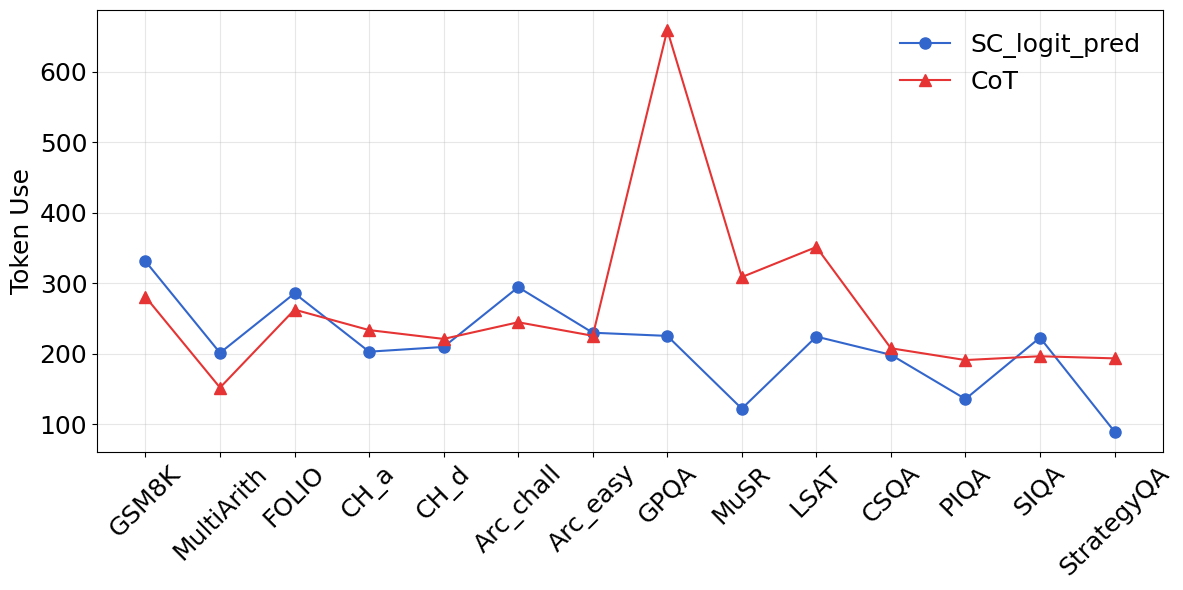

In [36]:

import matplotlib as mpl


# mpl.rcParams['text.usetex'] = False
# Define the specified order of Benchmarks
benchmark_order = [
    "gsm8k", "MultiArith",  "FOLIO", "ContextHub_abductive", 
    "ContextHub_deductive", "arc_challenge", "arc_easy","gpqa", "MuSR", 
    "lsat", "commensenseqa", "piqa", "siqa", "strategyqa"
]
custom_xticks = [
    "GSM8K", "MultiArith", "FOLIO", "CH_a", "CH_d", 
    "Arc_chall", "Arc_easy","GPQA",  "MuSR", "LSAT", 
    "CSQA", "PIQA", "SIQA", "StrategyQA"
]
# Reorder the merged DataFrame according to the benchmark order
merged_means['Benchmark'] = pd.Categorical(merged_means['Benchmark'], categories=benchmark_order, ordered=True)
merged_means = merged_means.sort_values('Benchmark')

color1 = (0.9, 0.2, 0.2)  # 柔和的红色
color2 = (0.2, 0.4, 0.8)  # 柔和的蓝色
color3 = (0.1, 0.5, 0.2)
# Plot the results with the specified order
plt.figure(figsize=(12, 6))
benchmarks = merged_means['Benchmark']
x = range(len(benchmarks))

plt.plot(x, merged_means['logit_pred_token_use']+50, marker='o', label='SC_logit_pred',color=color2, markersize=8)
# plt.plot(x, merged_means['enumerate_pred_token_use'], marker='s', label='enumerate_pred_token_use')
plt.plot(x, merged_means['CoT_mean_tokens'], marker='^', label='CoT',color=color1, markersize=8)

plt.xticks(x, custom_xticks, rotation=45, fontsize=18)
# plt.xlabel('Benchmark')
plt.yticks(fontsize=18)
plt.ylabel('Token Use', fontsize=18)
# plt.title('Mean Comparison by Benchmark')
plt.legend(fontsize=18)
plt.tight_layout()
plt.savefig('token_use_figure.pdf', format='pdf')
plt.show()


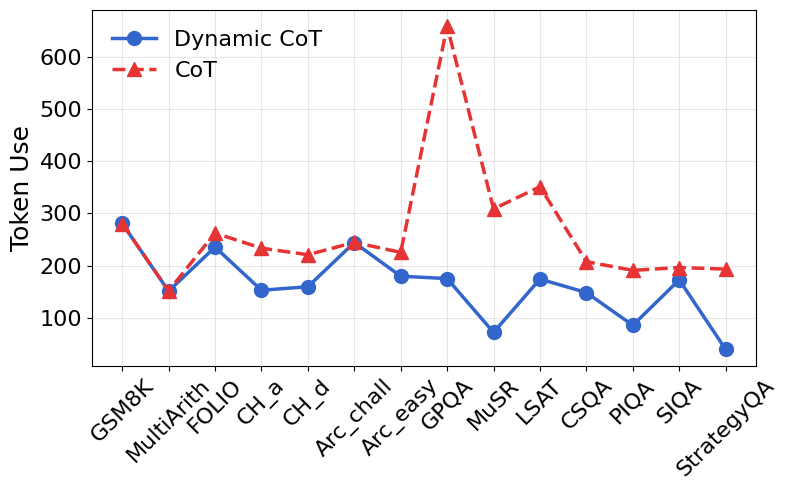

In [37]:
import matplotlib.pyplot as plt
import matplotlib as mpl

# Set ICML-friendly style
# mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['axes.grid'] = True  # Light grid for readability
mpl.rcParams['grid.alpha'] = 0.3  # Slightly transparent grid
mpl.rcParams['legend.frameon'] = False  # No box around legend

plt.figure(figsize=(8, 5))  # Optimal size for ICML two-column format

# Plot lines with improved markers and line styles
plt.plot(x, merged_means['logit_pred_token_use'], 
         marker='o', markersize=10, linestyle='-', linewidth=2.5, 
         label='Dynamic CoT', color=color2)

plt.plot(x, merged_means['CoT_mean_tokens'], 
         marker='^', markersize=10, linestyle='--', linewidth=2.5, 
         label='CoT', color=color1)

# Customize ticks
plt.xticks(x, custom_xticks, rotation=45, fontsize=16)
plt.yticks(fontsize=16)

# Labels
plt.ylabel('Token Use', fontsize=18)
# plt.xlabel('Your X-axis Label', fontsize=18)  # Add xlabel if needed

# Adjust legend
plt.legend(fontsize=16, loc='upper left')

# Tight layout for better spacing
plt.tight_layout()

# Save with proper DPI for print quality
plt.savefig('token_use_figure.pdf', format='pdf', dpi=300)

plt.show()


In [38]:
mean_diff = merged_means['logit_pred_token_use'].mean() - merged_means['CoT_mean_tokens'].mean()
print("均值差:", mean_diff)


均值差: -103.89786607142855


In [39]:
merged_means['CoT_mean_tokens'].mean()

266.1255357142857

In [40]:
merged_means['logit_pred_token_use'].mean() +50

212.22766964285717

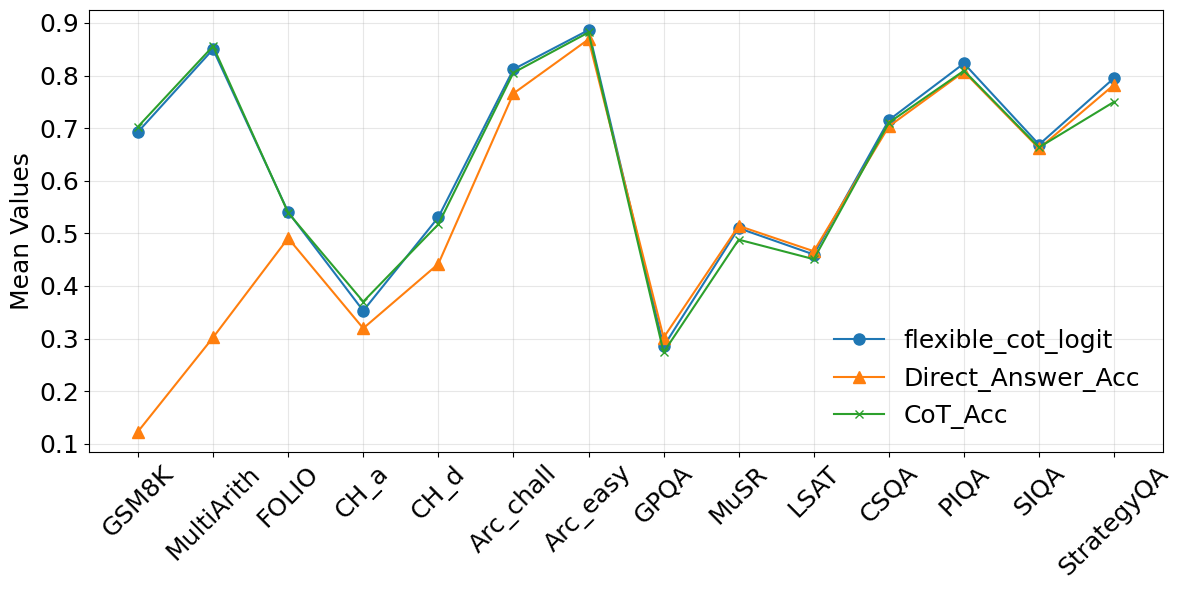

In [41]:
# Recalculate and process for new metrics
# Calculate means grouped by Benchmark for the new metrics
df1_means_new = df1.groupby('Benchmark')[['flexible_cot_logit', 'flexible_cot_enumerate']].mean().reset_index()
df2_means_new = df2.groupby('Benchmark')[['Direct_Answer_Acc', 'CoT_Acc']].mean().reset_index()

# Merge the new means on Benchmark
merged_means_new = pd.merge(df1_means_new, df2_means_new, on='Benchmark', how='inner')

# Reorder the merged DataFrame according to the specified benchmark order
merged_means_new['Benchmark'] = pd.Categorical(merged_means_new['Benchmark'], categories=benchmark_order, ordered=True)
merged_means_new = merged_means_new.sort_values('Benchmark')

# Plot the results
plt.figure(figsize=(12, 6))
benchmarks_new = merged_means_new['Benchmark']
x_new = range(len(benchmarks_new))

plt.plot(x_new, merged_means_new['flexible_cot_logit'], marker='o', label='flexible_cot_logit', markersize=8)
# plt.plot(x_new, merged_means_new['flexible_cot_enumerate'], marker='s', label='flexible_cot_enumerate')
plt.plot(x_new, merged_means_new['Direct_Answer_Acc'], marker='^', label='Direct_Answer_Acc', markersize=8)
plt.plot(x_new, merged_means_new['CoT_Acc'], marker='x', label='CoT_Acc')

plt.xticks(x, custom_xticks, rotation=45, fontsize=18)
# plt.xlabel('Benchmark')
plt.yticks(fontsize=18)
plt.ylabel('Mean Values', fontsize=18)
# plt.title('Mean Comparison by Benchmark for Flexible CoT and Accuracy Metrics')
plt.legend(fontsize=18)
plt.tight_layout()
plt.savefig('flexible_acc_figure.pdf', format='pdf')
plt.show()


In [42]:
x_new

range(0, 14)

In [43]:
merged_means_new['flexible_cot_logit']

9     0.692875
4     0.850000
2     0.540525
0     0.352875
1     0.530625
5     0.811950
6     0.886500
8     0.285175
3     0.509925
10    0.459850
7     0.715425
11    0.823125
12    0.668850
13    0.795425
Name: flexible_cot_logit, dtype: float64

In [44]:
merged_means_new['Direct_Answer_Acc']

9     0.123200
4     0.302075
2     0.490875
0     0.319475
1     0.441975
5     0.765975
6     0.868900
8     0.301875
3     0.514225
10    0.466050
7     0.703500
11    0.807275
12    0.661450
13    0.782650
Name: Direct_Answer_Acc, dtype: float64

In [45]:
merged_means_new['CoT_Acc']

9     0.702800
4     0.855850
2     0.539250
0     0.370200
1     0.517275
5     0.805450
6     0.882050
8     0.273975
3     0.488100
10    0.450950
7     0.710500
11    0.809300
12    0.663500
13    0.750225
Name: CoT_Acc, dtype: float64

In [46]:
import json
import pandas as pd

# Load the data from the two files
file1_path = 'flexible_cot_result_50_C0_1.json'
file2_path = 'All_results.json'

with open(file1_path, 'r') as file1, open(file2_path, 'r') as file2:
    data1 = json.load(file1)
    data2 = json.load(file2)

# Convert the JSON data to pandas DataFrames for easier processing
df1 = pd.DataFrame(data1)
df2 = pd.DataFrame(data2)
# df1=df1[(df1['logit_w'] > 0) | ((df1['logit_w'] < 0) & (df1['logit_threshold_clipped'] == 1)) | ((df1['logit_w'] < 0) & (df1['logit_threshold_clipped'] == -1))]
# Merge the two DataFrames on 'Benchmark' and 'Model'
merged_df = pd.merge(df1, df2, on=['Benchmark', 'Model'])
merged_df=merged_df[(merged_df['Benchmark']!='gsm8k')&(merged_df['Benchmark']!='MultiArith')]
# Calculate max_acc as the maximum of 'Direct_Answer_Acc' and 'CoT_Acc'
merged_df['max_acc'] = merged_df[['Direct_Answer_Acc', 'CoT_Acc']].max(axis=1)
# merged_df['max_acc'] = merged_df[['Direct_Answer_Acc', 'CoT_Acc']].max(axis=1)

# Calculate differences
merged_df['logit_diff'] = merged_df['flexible_cot_logit'] - merged_df['max_acc']
merged_df['enumerate_diff'] = merged_df['flexible_cot_enumerate'] - merged_df['max_acc']

# Calculate the means of the differences
logit_diff_mean = merged_df['logit_diff'].mean()
enumerate_diff_mean = merged_df['enumerate_diff'].mean()

# Output the results
logit_diff_mean, enumerate_diff_mean


(-0.0045145833333333375, -0.005127083333333335)

In [47]:
merged_df['logit_diff']

2    -0.0330
3    -0.0065
4    -0.0295
5    -0.0085
6     0.0062
7    -0.0008
8    -0.0079
9     0.0004
10   -0.0097
11    0.0026
12    0.0007
13    0.0018
16   -0.0411
17    0.0005
18   -0.0063
19    0.0013
20    0.0073
21    0.0059
22    0.0040
23   -0.0083
24    0.0032
25    0.0076
26    0.0044
27   -0.0082
30   -0.0370
31   -0.0031
32   -0.0271
33   -0.0317
34    0.0056
35    0.0050
36   -0.0103
37   -0.0112
38    0.0038
39    0.0056
40    0.0041
41    0.0067
44   -0.0249
45   -0.0016
46   -0.0064
47   -0.0068
48    0.0069
49    0.0077
50   -0.0030
51   -0.0057
52    0.0052
53    0.0096
54    0.0030
55    0.0028
Name: logit_diff, dtype: float64

In [48]:
file1_path = 'flexible_cot_result_50_C0_1.json'

with open(file1_path, 'r') as file1:
    data1 = json.load(file1)

# Convert the JSON data to a pandas DataFrame for easier processing
import pandas as pd

df1 = pd.DataFrame(data1)

# Filter the DataFrame based on the conditions
filtered_df = df1[(df1['logit_w'] < 0) & (df1['logit_threshold_clipped'] != 1) & (df1['logit_threshold_clipped'] != -1)]

# Count the number of elements that meet the criteria
filtered_count = len(filtered_df)
filtered_count
filtered_results = filtered_df[['Model', 'Benchmark']]
print(filtered_results,filtered_count)

                       Model             Benchmark
4      Llama-3.2-3B-Instruct  ContextHub_abductive
24     Phi-3.5-mini-instruct         commensenseqa
36  Mistral-7B-Instruct-v0.3                  MuSR
37  Mistral-7B-Instruct-v0.3                  lsat
38  Mistral-7B-Instruct-v0.3         commensenseqa
49     Llama-3.1-8B-Instruct              arc_easy
50     Llama-3.1-8B-Instruct                  MuSR
51     Llama-3.1-8B-Instruct                  lsat
54     Llama-3.1-8B-Instruct                  siqa 9


In [49]:
filtered_df = df1[(df1['logit_w'] < 0)]

# Count the number of elements that meet the criteria
filtered_count = len(filtered_df)
filtered_count

24

In [50]:
filtered_df = df1[ (df1['logit_threshold_clipped'] == 1) | (df1['logit_threshold_clipped'] == -1)]

# Count the number of elements that meet the criteria
filtered_count = len(filtered_df)
filtered_count

33

In [51]:
filtered_df = df1[ ((df1['logit_w'] < 0) & (df1['logit_threshold_clipped'] == 1)) | ((df1['logit_w'] > 0) & (df1['logit_threshold_clipped'] == -1))]

# all_cot_num
filtered_count = len(filtered_df)
filtered_count


24